In [1]:
#https://scikit-learn.org/stable/

In [2]:
#https://github.com/jmportilla/Udemy---Machine-Learning

In [3]:
#https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer
#http://www.astroml.org/sklearn_tutorial/general_concepts.html
#http://robotics.stanford.edu/people/nilsson/MLBOOK.pdf
#http://cs229.stanford.edu/syllabus.html
#https://www.coursera.org/learn/machine-learning

In [4]:
#https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/.ipynb_checkpoints/Supervised%20Learning%20-%20%20Linear%20Regression-checkpoint.ipynb

In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [8]:
type(boston)

sklearn.utils.Bunch

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

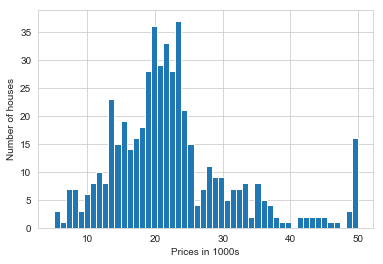

In [10]:
plt.hist(boston.target,bins = 50)
plt.xlabel('Prices in 1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

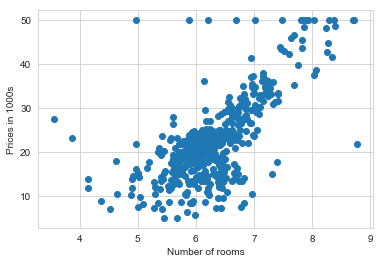

In [11]:
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('Prices in 1000s')
plt.xlabel('Number of rooms')

In [12]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston_df['Price'] = boston.target

In [14]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


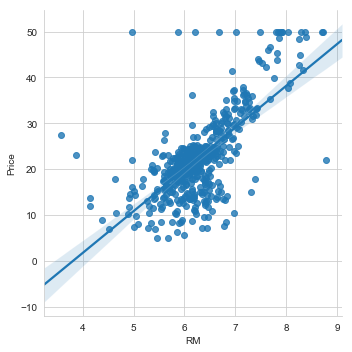

In [15]:
sns.lmplot('RM','Price',data = boston_df)

In [16]:
X = boston_df.RM

In [17]:
X.shape

(506,)

In [18]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [19]:
X = np.vstack(boston_df.RM)

In [20]:
X.shape

(506, 1)

In [21]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [22]:
Y = boston_df.Price

In [23]:
X = np.array([[value,float(1)] for value in X] )

In [26]:
X = X.astype(np.float64)
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [27]:
m,b = np.linalg.lstsq(X,Y)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


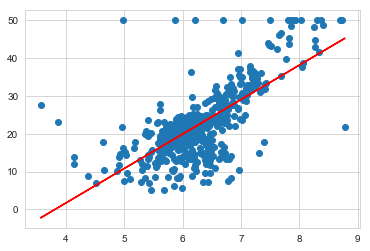

In [29]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x, m*x + b,'r', label = 'Best fit line')

In [30]:
result = np.linalg.lstsq(X,Y)
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [31]:
result[1]

array([22061.87919621])

In [34]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print('rmse was %.2f'%rmse)

rmse was 6.60


In [35]:
#RMSE corr approx 2 times the standard deviation

In [36]:
import sklearn
from sklearn.linear_model import LinearRegression

In [37]:
lreg = LinearRegression()

In [38]:
X_multi = boston_df.drop('Price',1)

In [39]:
Y_target = boston_df.Price

In [40]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
print('the estimated intercept coefficient is %.2f' % lreg.intercept_)


the estimated intercept coefficient is 36.46


In [43]:
print('the number of coefficients used was %d ' %len(lreg.coef_))# check the documentation on scikit learn https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

the number of coefficients used was 13 


In [45]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [46]:
# highest corr feature is RM

In [59]:

from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train,Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [62]:
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [63]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [65]:
print('fit a model X_train, and calculate MSE with Y_train : %2f' % np.mean((Y_train-pred_train)**2))


fit a model X_train, and calculate MSE with Y_train : 46.039233


In [68]:
print('fit a model X_train, and calculate MSE with X_test, Y_test: %.2f' % np.mean((Y_test - pred_test)**2))

fit a model X_train, and calculate MSE with X_test, Y_test: 36.94


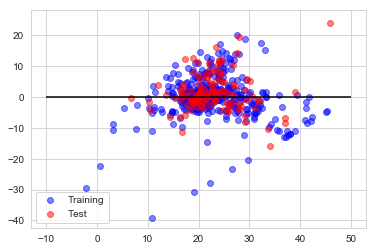

In [70]:
train = plt.scatter(pred_train,(pred_train - Y_train), c = 'b', alpha = 0.5)
test = plt.scatter(pred_test,(pred_test - Y_test), c = 'r', alpha = 0.5)
plt.hlines(y=0, xmin = -10,xmax=50)
plt.legend((train,test),('Training','Test'), loc = 'lower left')
plt.title =('Residual Plots')

# Logistic regression

In [73]:
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [74]:
df = sm.datasets.fair.load_pandas().data # sm for the statsmodel

In [75]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [76]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [77]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [78]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [79]:
df.shape

(6366, 10)

In [80]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [91]:
occ_dummies = pd.get_dummies(df['occupation'])

In [92]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [93]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [94]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [96]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [97]:
X = df.drop(['occupation','occupation_husb','Had_Affair'], axis = 1)

In [98]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis = 1)

In [99]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [100]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [101]:
X = pd.concat([X, dummies], axis = 1)

In [102]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [103]:
Y = df.Had_Affair

In [105]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [106]:
X = X.drop('occ1', axis =1)

In [107]:
X = X.drop('hocc1', axis =1)

In [108]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [109]:
X = X.drop('affairs', axis =1)

In [110]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [111]:
# we  need to flatten Y to use in scikit learn

In [112]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [113]:
Y = np.ravel(Y)

In [114]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [115]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [116]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [117]:
Y.mean()


0.3224945020420987

In [119]:
coeff_df = DataFrame(list(zip(X.columns,np.transpose(log_model.coef_))))

In [120]:
coeff_df

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [122]:
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
class_predict = log_model2.predict(X_test)

In [124]:
print( metrics.accuracy_score(Y_test, class_predict))

0.7236180904522613


# Multi class classification

In [126]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [127]:
iris = load_iris()

In [128]:
X = iris.data
Y = iris.target

In [132]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [133]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [134]:
iris_data = DataFrame(X, columns = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width'])

In [135]:
iris_target = DataFrame(Y, columns = ['Species'])

In [136]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [137]:
def flower(num):
    if num == 0:
        return 'Sentosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [138]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [140]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [141]:
iris = pd.concat([iris_data, iris_target], axis = 1
                )

In [142]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Sentosa
1,4.9,3.0,1.4,0.2,Sentosa
2,4.7,3.2,1.3,0.2,Sentosa
3,4.6,3.1,1.5,0.2,Sentosa
4,5.0,3.6,1.4,0.2,Sentosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


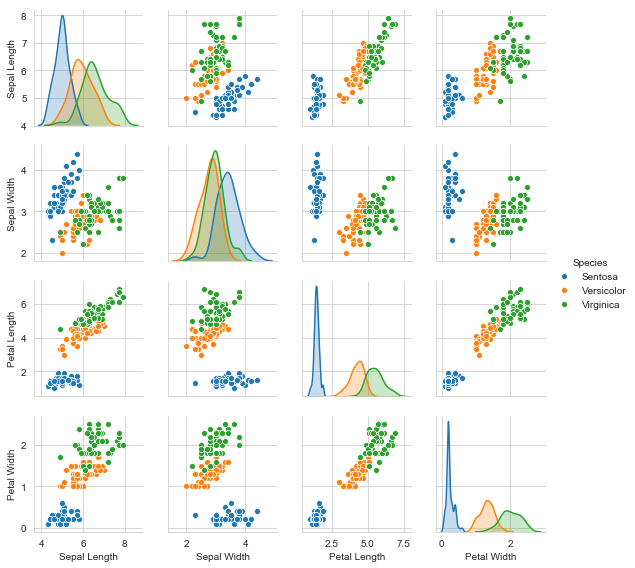

In [144]:
sns.pairplot(iris,hue = 'Species',size =2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: 'NoneType' object is not iterable

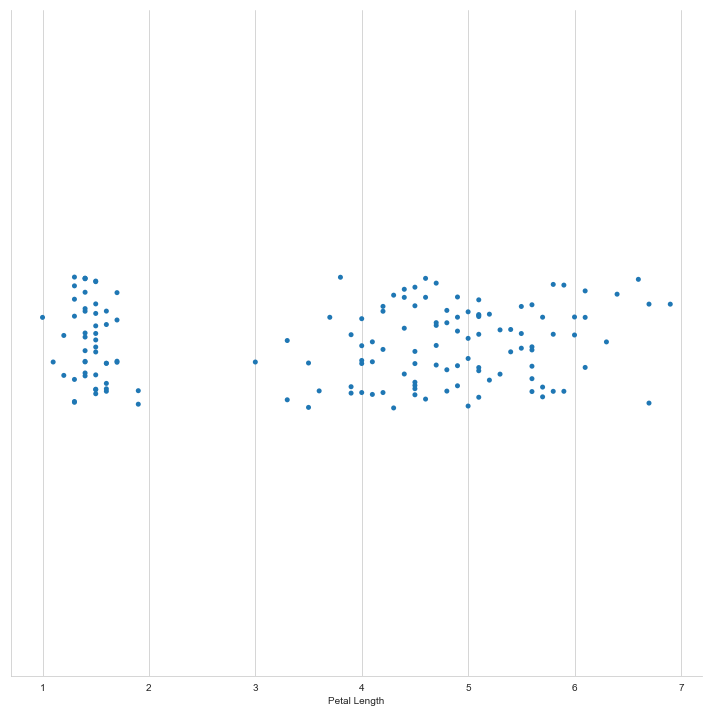

In [146]:
sns.catplot('Petal Length', data = iris, hue = 'Species',size = 10)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [152]:
logreg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4, random_state = 3)

In [153]:
logreg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
from sklearn import metrics

In [155]:
Y_pred = logreg.predict(X_test)

In [156]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9333333333333333


# KNN


In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [167]:
knn.fit = (X_train, Y_train)

In [169]:
from sklearn.exceptions import NotFittedError
try:
    Y_pred = knn.predict(X_test)
except NotFittedError as e:
    print(repr(e))

NotFittedError("This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.")


In [170]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


In [176]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [177]:
knn.fit = (X_train, Y_train)
try:
    Y_pred = knn.predict(X_test)
except NotFittedError as e:
    print(repr(e))
print(metrics.accuracy_score(Y_test,Y_pred))

NotFittedError("This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.")
0.9333333333333333


In [178]:
k_range = range(1,21)
accuracy = []

In [179]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

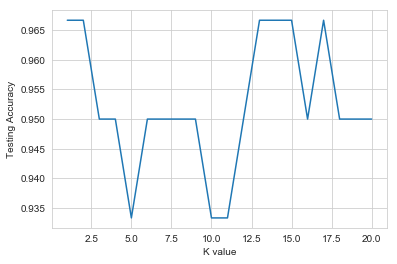

In [180]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')

# SVM